In [64]:
import pandas as pd
import datetime
import numpy as np


In [65]:
%config InlineBackend.figure_formats = ['svg']

from IPython.display import display, Markdown, Latex

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import re

## Load the reference Data

## AMD data
AMD data is poor quality, a better reference is needed

In [66]:

def load_reference_data(name, index='id', date_from_column='launch_date'):
    ref_dir = "./reference/"

    return pd.read_csv(
        ref_dir+name+".csv",
        index_col=index,
        parse_dates={"date":[date_from_column]})

amd_processors = load_reference_data("amd_processors")
amd_processors['processor_number'] = amd_processors['name'].str.lower()
amd_processors.loc[~(amd_processors['date'].isna()),'64'] = True
display(amd_processors)

,date,cores,threads,name,lithography,base_frequency,turbo_frequency,cache_l1,cache_l2,cache_l3,...,product_line,socket,memory_type,url,vertical_segment,max_temp,max_memory_speed,sku,processor_number,64
id,,,,,,,,,,,,,,,,,,,,,
1,2020-11-05,16.0,32.0,AMD Ryzen 9 5950X,7.0,3400,4900.0,NaN,8192.0,65536.0,...,AMD Ryzen 9 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10456,Boxed Processor,90.0,3200.0,10456,amd ryzen 9 5950x,True
2,2020-11-05,12.0,24.0,AMD Ryzen 9 5900X,7.0,3700,4800.0,NaN,6144.0,65536.0,...,AMD Ryzen 9 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10461,Boxed Processor,90.0,3200.0,10461,amd ryzen 9 5900x,True
3,2021-01-12,12.0,24.0,AMD Ryzen 9 5900 (OEM Only),7.0,3000,4700.0,NaN,6144.0,65536.0,...,AMD Ryzen 9 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10796,Desktop,95.0,3200.0,10796,amd ryzen 9 5900 (oem only),True
4,2020-11-05,8.0,16.0,AMD Ryzen 7 5800X,7.0,3800,4700.0,NaN,4096.0,32768.0,...,AMD Ryzen 7 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10466,Boxed Processor,90.0,3200.0,10466,amd ryzen 7 5800x,True
5,2021-01-12,8.0,16.0,AMD Ryzen 7 5800 (OEM Only),7.0,3400,4600.0,NaN,4096.0,32768.0,...,AMD Ryzen 7 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10791,Desktop,95.0,3200.0,10791,amd ryzen 7 5800 (oem only),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,NaT,4.0,4.0,AMD Opteron X2150 APU,28.0,1900,NaN,NaN,2048.0,NaN,...,AMD Opteron X2100 Series APU,FT3,DDR3,https://www.amd.com/en/product/5656,Server,NaN,NaN,5656,amd opteron x2150 apu,NaN
535,NaT,2.0,2.0,TL-64,NaN,2200,NaN,NaN,1024.0,NaN,...,AMD Turion 64 X2 Dual-Core Mobile Technology,S1,DDR2,https://www.amd.com/en/product/1706,Laptop,95.0,667.0,1706,tl-64,NaN
536,NaT,2.0,2.0,TL-60,NaN,2000,NaN,NaN,1024.0,NaN,...,AMD Turion 64 X2 Dual-Core Mobile Technology,S1,DDR2,https://www.amd.com/en/product/1701,Laptop,NaN,667.0,1701,tl-60,NaN


### Load Apple reference data
Apple Silicon for MacOS devices is new enough that we can just hand code it for now.

In [67]:
apple_data = [
    ['Apple M1', pd.to_datetime('2020-11-17'), True],
    ['Apple M1 Pro', pd.to_datetime('2021-10-26'), True],
    ['Apple M1 Max', pd.to_datetime('2021-10-26'), True],
    ['Apple M1 Ultra', pd.to_datetime('2022-03-18'), True],
    ]
apple_processors = pd.DataFrame(apple_data,columns=['name','date','64'])
apple_processors['processor_number']=apple_processors['name'].str.lower()
apple_processors

,name,date,64,processor_number
0,Apple M1,2020-11-17,True,apple m1
1,Apple M1 Pro,2021-10-26,True,apple m1 pro
2,Apple M1 Max,2021-10-26,True,apple m1 max
3,Apple M1 Ultra,2022-03-18,True,apple m1 ultra


### Load Intel reference data
Load data created by separate webscraper. File holds all relevant records from https://ark.intel.com

In [68]:
def load_scrapy_reference_data(name, index='id', date_from_column='launch_date'):
    ref_dir = "./reference/"

    return pd.read_csv(
        ref_dir+name+".csv",
        index_col=index,
        sep=';',
        parse_dates={"date":[date_from_column]})
intel_ark_processors = load_scrapy_reference_data("output")
display(intel_ark_processors.head(5))

,date,name,number,URL,socket,price,vertical_segment,processor_number,status,64,instruction_set,instruction_set_extensions
id,,,,,,,,,,,,
48140,2010-01-01,Core i3-330E Processor,i3-330E,https://ark.intel.com/content/www/us/en/ark/pr...,BGA1288,NaN,Mobile,i3-330E,Discontinued,True,64-bit,"SSE4.1, SSE4.2"
47663,2010-01-01,Core i3-330M Processor,i3-330M,https://ark.intel.com/content/www/us/en/ark/pr...,BGA1288,NaN,Mobile,i3-330M,Discontinued,True,64-bit,"SSE4.1, SSE4.2"
49021,2010-04-01,Core i3-330UM Processor,i3-330UM,https://ark.intel.com/content/www/us/en/ark/pr...,BGA1288,NaN,Mobile,i3-330UM,Discontinued,True,64-bit,"SSE4.1, SSE4.2"
43529,2010-01-01,Core i3-350M Processor,i3-350M,https://ark.intel.com/content/www/us/en/ark/pr...,BGA1288,NaN,Mobile,i3-350M,Discontinued,True,64-bit,"SSE4.1, SSE4.2"
50028,2010-10-01,Core i3-380UM Processor,i3-380UM,https://ark.intel.com/content/www/us/en/ark/pr...,BGA1288,NaN,Mobile,i3-380UM,Discontinued,True,64-bit,"SSE4.1, SSE4.2"


## Cleanup the data sourced form Intel
* Remove bad dates from the scraped intel data
* Normalise processor_number to lowercase

In [69]:
bad_dates = intel_ark_processors[(intel_ark_processors['date'].dt.year==2099)].index
intel_bad_dates_count = intel_ark_processors.loc[bad_dates].shape[0]
display(Markdown("### There are {} intel chips with bad launch date - Dropped".format(intel_bad_dates_count)))
display(Markdown("Reviewed and all with 2099 year are pre-2000 32-bit chips"))
# display(intel_ark_processors.loc[bad_dates])
intel_ark_processors.drop(bad_dates, inplace=True)
intel_ark_processors['processor_number'] = intel_ark_processors['processor_number'].str.lower()
# intel_ark_processors

### There are 17 intel chips with bad launch date - Dropped

Reviewed and all with 2099 year are pre-2000 32-bit chips

### We need to know if chips are 32 bit or not. 
The '64' column is not fully populated from ark so we need to clean that

In [70]:
display(Markdown('### Validate and correct for Intel Processors missing 64 bit flag in ref data'))
intel_missing_arch_count = intel_ark_processors[(intel_ark_processors['64'].isna())].shape[0]
display(Markdown("### There are {} intel chips with missing bus width data".format(intel_missing_arch_count)))
# display(intel_ark_processors[ intel_ark_processors['64'].isna()])
display(Markdown("* Set 64 bit flag True if instruction set contains '64'"))
display(Markdown("* Set 64 bit flag False if instruction set contains '32'"))
# intel_ark_processors['64'] = intel_ark_processors['64'].fillna(intel_ark_processors['instruction_set'].str.contains('64'), axis=0) # try to fill from instruction set
intel_ark_processors.loc[(intel_ark_processors['64'].isna()) & (intel_ark_processors['instruction_set'].str.contains('64')), '64'] = True # try to fill from instruction set
intel_ark_processors.loc[(intel_ark_processors['64'].isna()) & (intel_ark_processors['instruction_set'].str.contains('32')), '64'] = False # try to fill from instruction set
# display(intel_ark_processors[ intel_ark_processors['64'].isna()])
display(Markdown("* Set 64 bit flag if processor is Itanium"))
intel_ark_processors.loc[(intel_ark_processors['64'].isna()) & (intel_ark_processors['name'].str.contains('Itanium')), '64'] = True # try to fill from instruction set
# display(intel_ark_processors[(intel_ark_processors['64'].isna()) & (intel_ark_processors['instruction_set'].isna())])
# display(intel_ark_processors[ intel_ark_processors['name'].str.contains("Celeron Processor ULV 763")])
display(Markdown("* Set 64 bit flag if processor is Celeron and date after 2004 (see https://www.cpu-world.com/CPUs/Celeron/index.html)"))
intel_ark_processors.loc[(intel_ark_processors['64'].isna()) 
    & (intel_ark_processors['name'].str.contains('Celeron')) 
    & (intel_ark_processors['date'].dt.year >= 2005), '64'] = True
intel_missing_arch_count = intel_ark_processors[(intel_ark_processors['64'].isna())].shape[0]
display(Markdown("### There are {} intel chips with missing bus width data".format(intel_missing_arch_count)))

### Validate and correct for Intel Processors missing 64 bit flag in ref data

### There are 202 intel chips with missing bus width data

* Set 64 bit flag True if instruction set contains '64'

* Set 64 bit flag False if instruction set contains '32'

* Set 64 bit flag if processor is Itanium

* Set 64 bit flag if processor is Celeron and date after 2004 (see https://www.cpu-world.com/CPUs/Celeron/index.html)

### There are 0 intel chips with missing bus width data

## How many CPU models per year are in our reference data?


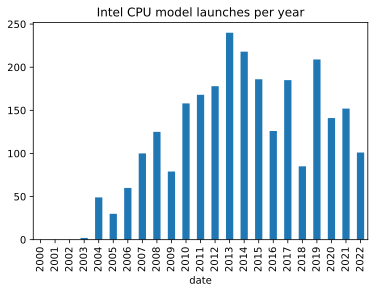

In [71]:
df =  intel_ark_processors[~intel_ark_processors['date'].isna()].groupby(pd.Grouper(key='date', axis=0, freq='Y'))['processor_number'].agg('count')
ax = df.plot.bar()
# display(df)
plt.ticklabel_format(style='plain', axis='y')
# plt.set_index(just_cpu['date'].map(lambda s: s.strftime('%Y')))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# ax.set_xlim(df.index[0], df.index[-1])
# locator = mdates.YearLocator()
# ax.xaxis.set_major_locator(locator)
ax.set_title("Intel CPU model launches per year")
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, p: str(df.index[x])[0:4]))
# plt.show()

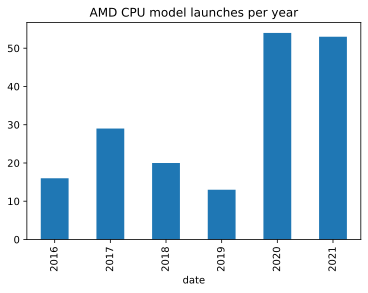

In [72]:
df =  amd_processors[~amd_processors['date'].isna()].groupby(pd.Grouper(key='date', axis=0, freq='Y'))['processor_number'].agg('count')
ax = df.plot.bar()
# display(df)
plt.ticklabel_format(style='plain', axis='y')
# plt.set_index(just_cpu['date'].map(lambda s: s.strftime('%Y')))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# ax.set_xlim(df.index[0], df.index[-1])
# locator = mdates.YearLocator()
# ax.xaxis.set_major_locator(locator)
ax.set_title("AMD CPU model launches per year")
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, p: str(df.index[x])[0:4]))
# plt.show()

## Examine the 32 bit and 64 bit CPU production (Intel only)
Data suggests that Intel stopped making all 32 bit CPUs in 2015. The reality is that for the preceding decade most of the 32-bit CPUs were targetted for low power/embedded devices and unlikely to be found in SL.

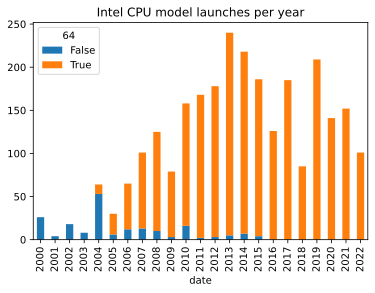

In [73]:
df =  intel_ark_processors[~intel_ark_processors['date'].isna()].groupby([pd.Grouper(key='date', axis=0, freq='Y'), '64']).size().unstack(1)
# display(df)
ax = df.plot(kind='bar', stacked=True)
plt.ticklabel_format(style='plain', axis='y')
# plt.set_index(just_cpu['date'].map(lambda s: s.strftime('%Y')))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# ax.set_xlim(df.index[0], df.index[-1])
# locator = mdates.YearLocator()
# ax.xaxis.set_major_locator(locator)
ax.set_title("Intel CPU model launches per year")
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, p: str(df.index[x])[0:4]))
# ax.set_yscale('')
plt.show()

### Is AMD data viable? Check how many we are missing launch dates for
Data quality for AMD is pretty poor.
We'll need to check how badly this affects us. We can see that our reference data has no launch dates for CPUs before 2016

In [74]:
num_amd_without_date = amd_processors[(amd_processors['date'].isna())].shape[0]
num_amd = amd_processors.shape[0]
display(Markdown("### {pct_undated:.2f}% of AMD processors have no launch date ({undated}/{total})".format(undated=num_amd_without_date, total=num_amd, pct_undated=num_amd_without_date/num_amd*100)))

### 65.61% of AMD processors have no launch date (353/538)

## Reference data processing complete.
# Load in the Firestorm stats
The data represents all sessions during February 2022, and the same period in the preceding year.
Note: This data leave a lot to be desired. Laptop users are far less likely to stay connected and thus will have more discrete sessions lending the data a significant laptop bias that may not be correct.
The hope is that we can get per device data in a future iteration.

In [75]:
fs_cpu_gpu_feb_22 = pd.read_csv(
    "./stats/cpu+gpu_Feb_2022.csv",
    skipinitialspace=True)
fs_cpu_gpu_feb_21 = pd.read_csv(
    "./stats/cpu+gpu_Feb_2021.csv",
    skipinitialspace=True)

In [76]:
display(fs_cpu_gpu_feb_22.head())
display(fs_cpu_gpu_feb_21.head())

,CPU_GPU,CNT
0,Apple M1 (2400 MHz) :: MISC Class 3 Apple Ap...,66177
1,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,39879
2,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,32798
3,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,26398
4,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,23506


,CPU_GPU,CNT
0,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,70996
1,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz (2592...,54906
2,Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz (2208...,54660
3,Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz (280...,52692
4,Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz (259...,48324


## The cpu and gpu fields are concatenated, so let's split them.

### split the CPU and GPU into discrete columns (note these are not unique)

In [77]:
def split_cpu_gpu(df):
    return  df.CPU_GPU.str.split(' :: ', expand=True)

fs_cpu_gpu_feb_22[['cpu','gpu']] = split_cpu_gpu(fs_cpu_gpu_feb_22)
display(fs_cpu_gpu_feb_22.head())
fs_cpu_gpu_feb_21[['cpu','gpu']] = split_cpu_gpu(fs_cpu_gpu_feb_21)
display(fs_cpu_gpu_feb_21.head())

,CPU_GPU,CNT,cpu,gpu
0,Apple M1 (2400 MHz) :: MISC Class 3 Apple Ap...,66177,Apple M1 (2400 MHz),MISC Class 3 Apple Apple M1
1,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,39879,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...
2,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,32798,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...
3,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,26398,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...
4,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,23506,Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz (259...,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...


,CPU_GPU,CNT,cpu,gpu
0,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,70996,Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz (2400...,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...
1,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz (2592...,54906,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz (2592...,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...
2,Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz (2208...,54660,Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz (2208...,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...
3,Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz (280...,52692,Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz (280...,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...
4,Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz (259...,48324,Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz (259...,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...


## Assign the CPU Make where possible
The CPU Make is determined by a relatively simple set of regular expressions.
The Regex are not optimised in order to make it simpler to add new groups as required.
There are 5 categories at present, AMD, Intel, Apple, Virtual and PS4
PS4 is actually two AMD chips that were only ever sold through Sony and is now (apparently) running Firestorm Linux
Virtual is unclassifiable and will be ignored as appropriate

## Total sessions Feb this year: 8348622

## Total sessions Feb last year: 8987169

## CPU by make - Feb 2021

cpu_make
AMD        1942320
Apple        16833
Intel      7015164
Virtual       2017
Name: CNT, dtype: int64

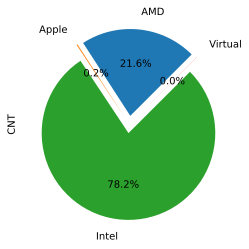

## CPU by make - Feb 2022

cpu_make
AMD        1976285
Apple        85247
Intel      5941861
PS4              7
Virtual       2219
Name: CNT, dtype: int64

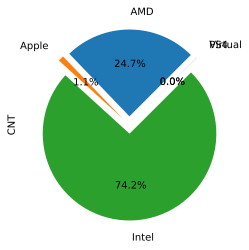

In [78]:
def extract_CPU_make(df):
    df['cpu_make'] =  df['cpu'].str.extract('^\s*(Intel|AMD|Apple)')
    df.loc[(df['cpu_make'].isna()) & (df['cpu'].str.contains('Pentium')), 'cpu_make'] =  'Intel' # for any pentiums that are not already assigned set them to Intel
    df.loc[(df['cpu_make'].isna()) & (df['cpu'].str.contains('Celeron')), 'cpu_make'] =  'Intel' # same for Celeron
    df.loc[(df['cpu_make'].isna()) & (df['cpu'].str.contains('Radeon')), 'cpu_make'] =  'AMD' # AMD specifics
    df.loc[(df['cpu_make'].isna()) & (df['cpu'].str.contains('A4-6210')), 'cpu_make'] =  'AMD' # ditto
    df.loc[(df['cpu_make'].isna()) & (df['cpu'].str.contains('\+8G')), 'cpu_make'] =  'AMD' # best guess corrupted entry likely extreme edition Radeon +8G
    df.loc[(df['cpu_make'].isna()) & (df['cpu'].str.contains('Quad-Core Processor')), 'cpu_make'] =  'AMD' # best guess corrupted entry likely Phenom X4 range
    df.loc[(df['cpu_make'].isna()) & (df['cpu'].str.contains('Virtual')), 'cpu_make'] =  'Virtual' # Lots of virtuals which don't help us much
    df.loc[(df['cpu_make'].isna()) & (df['cpu'].str.contains('Common KVM processor')), 'cpu_make'] =  'Virtual' # Lots of virtuals which don't help us much
    df.loc[(df['cpu_make'].isna()) & (df['cpu'].str.contains('[01][0-9]/[0-9](?:[a-z])?')), 'cpu_make'] =  'Virtual' # Lots of virtuals which don't help us much
    df.loc[(df['cpu_make'].isna()) & (df['cpu'].str.contains('DG1002FGF84HT|DG1101SKF84HV')), 'cpu_make'] =  'PS4' # Yep really!
    return df['cpu_make']

fs_cpu_gpu_feb_22['cpu_make'] = extract_CPU_make(fs_cpu_gpu_feb_22)
fs_cpu_gpu_feb_21['cpu_make'] = extract_CPU_make(fs_cpu_gpu_feb_21)

# display(fs_cpu_gpu_feb_22['cpu_make'].value_counts(dropna=False))
# display(fs_cpu_gpu_feb_21['cpu_make'].value_counts(dropna=False))
# display(fs_cpu_gpu_feb_22[fs_cpu_gpu_feb_22['cpu_make'].isna()])
# display(fs_cpu_gpu_feb_21[fs_cpu_gpu_feb_21['cpu_make'].isna()])
total_sessions_22 = fs_cpu_gpu_feb_22['CNT'].agg('sum')
total_sessions_21 = fs_cpu_gpu_feb_21['CNT'].agg('sum')

display(Markdown("## Total sessions Feb this year: " + str(total_sessions_22)))
display(Markdown("## Total sessions Feb last year: " + str(total_sessions_21)))

def plot_vendor_pie(df):
    display(df[['cpu_make','CNT']].groupby('cpu_make')['CNT'].agg('sum'))
    num_vendors = df[['cpu_make','CNT']].groupby('cpu_make')['CNT'].agg('sum').agg('count')
    explode = (0.1,) * num_vendors
    df[['cpu_make','CNT']].groupby('cpu_make')['CNT'].agg('sum').plot.pie(y='sum',autopct='%1.1f%%', shadow=False, explode = explode, startangle=45,labeldistance = 1.2)
    # ax = ((df.groupby('cpu_make')['CNT'].agg(['sum']) / total_sessions)*100).plot.pie(y='sum')
    ax.set_title("% Sessions by CPU Vendor")
    ax.set_xlabel("% Sessions")
    ax.set_ylabel("")
    plt.show()
    # ax.set_xticklabels(x_labels)
display(Markdown("## CPU by make - Feb 2021"))
plot_vendor_pie(fs_cpu_gpu_feb_21[['cpu_make', 'CNT']])
display(Markdown("## CPU by make - Feb 2022"))
plot_vendor_pie(fs_cpu_gpu_feb_22[['cpu_make', 'CNT']])

## Observation: The AMD data that we have is very poor quality and may need to be excluded. 
 As AMD only accounts for <25% of the total sessions we can ignore it still have a reasonable view of the population. The data that does have dates is predominantly newer AMD models and this may mean we have a better hit rate than expected. We can review this when we have more robust (non session-based) data. A better, more consistent source of AMD data needs to be found.

## Cleaning up the Session data more.

### The CPU data is quite dirty, lets have a quick stab at cleaning it up
The CPU data captured by the viewer is very low quality though this is mostly down to inconsistent labelling by the CPU manufacturers

In [79]:
def cleanup(df):
    df['cpu'] = df['cpu'].str.replace('( CPU )?@.*$','',regex=True) # trim the trailing junk that we're not using right now
    df['cpu'] = df['cpu'].str.replace('( CPU )',' ',regex=True) # remove the word CPU
    df['cpu'] = df['cpu'].str.replace('(\(R\))','',regex=True) # remove the '(R)'
    df['cpu'] = df['cpu'].str.replace('(\(TM\))','',regex=True) # remove the '(TM)'
    df['cpu'] = df['cpu'].str.replace('(i[3579]) +([0-9]+)',r'\g<1>-\g<2>',regex=True) # replace i7 960 with i7-960
    df['cpu'] = df['cpu'].str.replace('( \([0-9.]+ ?MHz\){1}.*)$','',regex=True) # trim the trailing junk that we're not using right now
    # df['cpu'] = df['cpu'].str.replace('(Xeon.*E[0-9][^0-9]+[0-9]{4})( v)([0-9])',r'\g<1>V\g<3>',regex=True) # replace lowercase v in Xeons andclean whitespace
    df['cpu'] = df['cpu'].str.replace('(Xeon.*E5\-267)8',r'\g<1>0',regex=True) # E5-2678 is not in ARK 2670 is and has same date :-(
    df['cpu'] = df['cpu'].str.replace('(Xeon.*W\-[0-9]{4}).*$',r'\g<1>',regex=True) # E5-2678 is not in ARK 2670 is and has same date :-(
    df['cpu'] = df['cpu'].str.replace('(i[357]\-10[0-9])[0-9]N(\S*)',r'\g<1>0\g<2>',regex=True) # remove the N from 10th gen and clamp to power class 0
    df['cpu'] = df['cpu'].str.replace('(i9\-109)[0-9]{2}(\S*)(?<!(XE|HK))',r'\g<1>00\g<2>',regex=True) # 10th gen i9 hpx clamp to power class 0
    df['cpu'] = df['cpu'].str.replace('(i9\-109)[0-9]{2}(\S*)(?<=(XE|HK))',r'\g<1>80\g<2>',regex=True) # except XE and HK clamp to power class 8
    df['cpu'] = df['cpu'].str.replace('(i9\-108)[0-9]{2}(\S*)(?<!(H))',r'\g<1>50\g<2>',regex=True) # 10th gen i9 hp clamp to power class 5
    df['cpu'] = df['cpu'].str.replace('(i9\-108)[0-9]{2}(\S*)(?<=(H))',r'\g<1>85\g<2>',regex=True) # except H which is 8
    # df['cpu'] = df['cpu'].str.replace('((Core) m([0-9]\-[0-9]{1}Y[0-9]{2})',r'\g<1> M\g<2>',regex=True) # core m needs M
    # df['cpu'] = df['cpu'].str.replace('(Xeon.*E[0-9][^0-9]+[0-9]{2})([0-9]{2})( v)([0-9])',r'\g<1>00V\4',regex=True) 
    return df.replace({"^\s*|\s*$":""}, regex=True) # clear leading/trailing space

fs_cpu_gpu_feb_22 = cleanup(fs_cpu_gpu_feb_22)
fs_cpu_gpu_feb_21 = cleanup(fs_cpu_gpu_feb_21)


## Extract the cpu code to allow lookup against the vendor ref data
There's a few guesses made here. Failure to produce a valid code will fail the launch date lookup later. Processor codes are downcased for matching.

In [80]:
def special_lookup(row):
    return re.search(r'(\S+)$',row)

# fs_cpu_gpu_feb_22['cpu_code']
def create_processor_number(row):
    intel_cpu_code_re = [
        r'((W([0-9]+)?)|(E[0-9]\-[0-9]+(V[0-9]+)?))', # patterns matching Wnnnn or E-nnnnVnn
        r'([NGQJEPT][0-9]{4})', # patterns match a prefix letter and 4 exactly digits
        r'([0-9]{4}[UM])', # ddddU
        r'(i[0-9]-[0-9]+[\S]+)', # typical modern core i series. forms such as i7-1337OMG 
    ]
    # AMD is not well developed yet
    amd_cpu_code_re = [
        r'(AMD Ryzen [0-9] [0-9]+[\S])',
        r'((AMD Athlon)(?:[\S]+)? ?(?:[\S]+ ?){0,2} ?[0-9]{3,4}([\S])?)' ]
    apple_cpu_code_re = [
        r'(Apple M[0-9]( (Max|Pro|Ultra))?)'
    ]
    try:
        # display(row.head())
        if row['cpu_make'] == 'Intel':
            # row['processor_number'] = row['cpu'].str.extract('()', expand=True)
            try:
                return re.search('(' + '|'.join(intel_cpu_code_re) + ')', row["cpu"])[0]
            except TypeError:
                # Some need a remapping in order to find a match
                try:
                    grps = re.search('((i[3579]) ?([QMT]*) (\S+)$') # i7 Q 4578 -> i7-4578Q 
                    if grps is not None:
                        return grps[1]+'-'+grps[3]+grps[2]
                    return re.search('(\S+)$', row["cpu"])[0] # or just match the block of non space at the line end
                except TypeError:
                    pass
            try:
                return special_lookup(row["cpu"]) # last ditch lookup, can be used for special cases
            except:
                return None
        if row['cpu_make'] == 'Apple':
            # row['processor_number'] = row['cpu'].str.extract('()', expand=True)
            try:
                return re.search('(' + '|'.join(apple_cpu_code_re) + ')', row["cpu"])[0]
            except TypeError:
                    return None
        if row['cpu_make'] == 'AMD':
            # row['processor_number'] = row['cpu'].str.extract('()', expand=True)
            try:
                return re.search('(' + '|'.join(amd_cpu_code_re) + ')', row["cpu"])[0]
            except TypeError:
                    return None
    except KeyError:
        return None

fs_cpu_gpu_feb_22['processor_number'] = fs_cpu_gpu_feb_22.apply(create_processor_number,axis=1)
fs_cpu_gpu_feb_21['processor_number'] = fs_cpu_gpu_feb_21.apply(create_processor_number,axis=1)
fs_cpu_gpu_feb_22['processor_number'] = fs_cpu_gpu_feb_22['processor_number'].str.lower()
fs_cpu_gpu_feb_21['processor_number'] = fs_cpu_gpu_feb_21['processor_number'].str.lower()


## As we saw before we have a small number of Virtual machines
The majority are either Linux or Mac based with a small number Windows.
Based on this very small sample, it appears to be a stable trend. It is worth noting that a number of M1 Macs are running as Virtual Machines.

Note: It is not unknown for users to run the windows viewer under WINE on Linux and at one time Mac users were said to get better results on some hardware by running the Windows binary.

Note2: We see from the gpu that some of the VirtualApples are in fact M1 hardware, so we leave them as Virtual but add a processor_number

In [81]:
fs_cpu_gpu_feb_21.loc[(fs_cpu_gpu_feb_21['cpu_make'] == 'Virtual') & (fs_cpu_gpu_feb_21['gpu'].str.contains('Apple M1$', regex=True)),'processor_number'] = 'Apple M1'
# display(fs_cpu_gpu_feb_21.loc[(fs_cpu_gpu_feb_21['cpu'] == 'VirtualApple') & (fs_cpu_gpu_feb_21['gpu'].str.contains('Apple M1'))])
display(Markdown("### {} Apple M1s were running as VMs in {}".format(fs_cpu_gpu_feb_21.loc[(fs_cpu_gpu_feb_21['cpu'] == 'VirtualApple') & (fs_cpu_gpu_feb_21['gpu'].str.contains('Apple M1$',regex=True)),'CNT'].agg('sum'), 2021)))
fs_cpu_gpu_feb_22.loc[(fs_cpu_gpu_feb_22['cpu_make'] == 'Virtual') & (fs_cpu_gpu_feb_22['gpu'].str.contains('Apple M1$')),'processor_number'] = 'Apple M1'
display(Markdown("### {} Apple M1s were running as VMs in {}".format(fs_cpu_gpu_feb_22.loc[(fs_cpu_gpu_feb_22['cpu'] == 'VirtualApple'),'CNT'].agg('sum'), 2022)))
display(fs_cpu_gpu_feb_22[(fs_cpu_gpu_feb_22['cpu_make'] == 'Virtual')].head(5))
num_vms_22 = fs_cpu_gpu_feb_22[(fs_cpu_gpu_feb_22['cpu_make'] == 'Virtual')]['CNT'].agg('sum')
num_vms_21 = fs_cpu_gpu_feb_21[(fs_cpu_gpu_feb_21['cpu_make'] == 'Virtual')]['CNT'].agg('sum')
display(Markdown("### There were {} VM based sessions in {} ({:0.2f}% of total)".format(num_vms_21, "Feb 21", num_vms_21/total_sessions_21*100)))
display(Markdown("### There were {} VM based sessions in {} ({:0.2f}% of total)".format(num_vms_22, "Feb 22", num_vms_22/total_sessions_22*100)))

### 1716 Apple M1s were running as VMs in 2021

### 555 Apple M1s were running as VMs in 2022

,CPU_GPU,CNT,cpu,gpu,cpu_make,processor_number
2258,VirtualApple @ 2.50GHz processor (2400 MHz) ::...,544,VirtualApple,MISC Class 3 Apple Apple M1,Virtual,Apple M1
3434,06/7a (1094.4 MHz) :: MISC Class 0 Red Hat v...,345,06/7a,MISC Class 0 Red Hat virgl,Virtual,None
5539,06/8c (2995.2 MHz) :: MISC Class 2 Red Hat v...,202,06/8c,MISC Class 2 Red Hat virgl,Virtual,None
6034,06/7a (1094.4 MHz) :: MISC Class 0 Mesa/X.or...,184,06/7a,MISC Class 0 Mesa/X.org virgl,Virtual,None
8908,06/7a (1094.4 MHz) :: MISC Class 1 Mesa/X.or...,120,06/7a,MISC Class 1 Mesa/X.org virgl,Virtual,None


### There were 2017 VM based sessions in Feb 21 (0.02% of total)

### There were 2219 VM based sessions in Feb 22 (0.03% of total)

In [82]:
display(fs_cpu_gpu_feb_21[['cpu','gpu','CNT']].head(20).sort_values('CNT', ascending=False))
display(fs_cpu_gpu_feb_22[['cpu','gpu','CNT']].head(20).sort_values('CNT', ascending=False))

,cpu,gpu,CNT
0,Intel Core i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,70996
1,Intel Core i7-9750H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,54906
2,Intel Core i7-8750H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,54660
3,Intel Core i7-7700HQ,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,52692
4,Intel Core i7-6700HQ,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,48324
5,Intel Core i7-9750H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,47832
6,Intel Core i7-7700HQ,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,46329
7,Intel Core i7-9750H,NVIDIA Class 5 NVIDIA Corporation GeForce RTX ...,44647
8,Intel Core i5-8300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,44276
9,Intel Core i7-10750H,NVIDIA Class 5 NVIDIA Corporation GeForce RTX ...,40329


,cpu,gpu,CNT
0,Apple M1,MISC Class 3 Apple Apple M1,66177
1,Intel Core i5-9300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,39879
2,Intel Core i7-10750H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,32798
3,Intel Core i5-9300H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,26398
4,Intel Core i7-10750H,NVIDIA Class 5 NVIDIA Corporation NVIDIA GeFor...,23506
5,Intel Core i5-8250U,INTEL Class 3 Intel Intel(R) UHD Graphics 620,22821
6,11th Gen Intel Core i5-1135G7,INTEL Class 4 Intel Intel(R) Iris(R) Xe Graphics,22809
7,Intel Core i7-9750H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,22646
8,Intel Core i5-10300H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,22565
9,Intel Core i7-9750H,NVIDIA Class 5 NVIDIA Corporation GeForce GTX ...,22548


## Various things may remain unmatched just check to see if we can do better

In [83]:
unmatched_intel_22 = fs_cpu_gpu_feb_22[(fs_cpu_gpu_feb_22['cpu_make'] == 'Intel') & (fs_cpu_gpu_feb_22['processor_number'].isna())].groupby(fs_cpu_gpu_feb_22['cpu']).agg('sum')
unmatched_intel_21 = fs_cpu_gpu_feb_21[(fs_cpu_gpu_feb_21['cpu_make'] == 'Intel') & (fs_cpu_gpu_feb_21['processor_number'].isna())].groupby(fs_cpu_gpu_feb_21['cpu']).agg('sum')

sessions = unmatched_intel_21['CNT'].agg('sum')
display(Markdown("### There were {num} unmatched {mk} CPUs in {yr}, totalling {s} sessions or {spct:0.2f}% of all sessions".format(num=unmatched_intel_21.shape[0], mk='Intel', yr=2021, s=sessions, spct = sessions/total_sessions_22*100)))
sessions = unmatched_intel_22['CNT'].agg('sum')
display(Markdown("### There were {num} unmatched {mk} CPUs in {yr}, totalling {s} sessions or {spct:0.2f}% of all sessions".format(num=unmatched_intel_22.shape[0], mk='Intel', yr=2022, s=sessions, spct = sessions/total_sessions_22*100)))
# display(unmatched_intel_21)
# fs_cpu_gpu_feb_22[(fs_cpu_gpu_feb_22['cpu_make'] == 'Apple') & (fs_cpu_gpu_feb_22['processor_number'].isna())].groupby(fs_cpu_gpu_feb_22['cpu']).agg('sum')
# fs_cpu_gpu_feb_22[(fs_cpu_gpu_feb_22['cpu_make'] == 'Apple') ].groupby(fs_cpu_gpu_feb_22['cpu']).agg('sum')

### There were 227 unmatched Intel CPUs in 2021, totalling 91241 sessions or 1.09% of all sessions

### There were 203 unmatched Intel CPUs in 2022, totalling 59774 sessions or 0.72% of all sessions

## We have multiple rows per CPU, so let's resolve that.
As each CPU can be matched with multiple different GPUs we will no discard the GPU and focus on CPU alone.
This puts the previous Apple anomally back in context with both Intel and AMD having a far higher presence as we'd expect

In [84]:
def summarise_cpu_by_processor_number(df):
    # display(df.shape)
    just_cpu = df.drop(['CPU_GPU','gpu'], axis=1)
    just_cpu['count'] = just_cpu.groupby('processor_number')['CNT'].transform('sum')
    return just_cpu.drop_duplicates(subset=['processor_number'])

just_cpu_this_year = summarise_cpu_by_processor_number(fs_cpu_gpu_feb_22)
just_cpu_last_year = summarise_cpu_by_processor_number(fs_cpu_gpu_feb_21)
# display(just_cpu)
# display(just_cpu_this_year[just_cpu_this_year['cpu_make']=='AMD'].sort_values('count', axis=0, ascending=False).head(20))
display(just_cpu_last_year.sort_values('count', axis=0, ascending=False).head(20))

,CNT,cpu,cpu_make,processor_number,count
1,54906,Intel Core i7-9750H,Intel,i7-9750h,242043.0
3,52692,Intel Core i7-7700HQ,Intel,i7-7700hq,212513.0
2,54660,Intel Core i7-8750H,Intel,i7-8750h,208851.0
20,22873,Intel Core i7-8700,Intel,i7-8700,151150.0
4,48324,Intel Core i7-6700HQ,Intel,i7-6700hq,138478.0
9,40329,Intel Core i7-10750H,Intel,i7-10750h,136986.0
0,70996,Intel Core i5-9300H,Intel,i5-9300h,132439.0
18,24076,Intel Core i7-7700,Intel,i7-7700,124147.0
39,16878,Intel Core i5-8400,Intel,i5-8400,115604.0
135,7250,AMD Ryzen 5 3600 6-Core Processor,AMD,amd ryzen 5 3600,114021.0


In [85]:
unidentified_cpus_21 = just_cpu_last_year[(just_cpu_last_year['processor_number'].isna())]['count'].agg('sum')
unidentified_cpus_22 = just_cpu_this_year[(just_cpu_this_year['processor_number'].isna())]['count'].agg('sum')
# display(just_cpu_this_year)
display(unidentified_cpus_22)
if unidentified_cpus_22 or unidentified_cpus_21:
    display(Markdown("## Warning: {pct:0.2f}% of CPUs in {yr} are not properly identified and dated".format(pct=unidentified_cpus_21/total_sessions_21*100, yr=2021)))
    display(Markdown("## Warning: {pct:0.2f}% of CPUs in {yr} are not properly identified and dated".format(pct=unidentified_cpus_22/total_sessions_21*100, yr=2022)))

0.0

In [86]:
# display(just_cpu_this_year.shape)
# display(just_cpu_last_year.shape)
# # intel_processors.head()
# intel_with_year = fs_cpu_gpu_feb_22.merge(intel_processors[['processor_number','date']], on=['processor_number'])
# display(intel_with_year.head())
just_intel_22 = just_cpu_this_year[just_cpu_this_year['cpu_make']=='Intel']
just_intel_21 = just_cpu_last_year[just_cpu_last_year['cpu_make']=='Intel']
just_amd_22 = just_cpu_this_year[just_cpu_this_year['cpu_make']=='AMD']
just_amd_21 = just_cpu_last_year[just_cpu_last_year['cpu_make']=='AMD']
just_apple_22 = just_cpu_this_year[just_cpu_this_year['cpu_make']=='Apple']
just_apple_21 = just_cpu_last_year[just_cpu_last_year['cpu_make']=='Apple']

intel_with_date_22 = just_intel_22.merge(intel_ark_processors[['processor_number','date','64']], on=['processor_number'], how='left')
intel_with_date_21 = just_intel_21.merge(intel_ark_processors[['processor_number','date','64']], on=['processor_number'], how='left')
amd_with_date_22 = just_amd_22.merge(amd_processors[['processor_number','date','64']], on=['processor_number'], how='left')
amd_with_date_21 = just_amd_21.merge(amd_processors[['processor_number','date','64']], on=['processor_number'], how='left')
apple_with_date_22 = just_apple_22.merge(apple_processors[['processor_number','date','64']], on=['processor_number'], how='left')
apple_with_date_21 = just_apple_21.merge(apple_processors[['processor_number','date','64']], on=['processor_number'], how='left')
# intel_with_year = pd.concat([intel_with_year, intel_ark_with_year])


In [87]:
# intel_with_date_22[(intel_with_date_22['cpu'].str.contains('i[3579]')) & ~(intel_with_date_22['processor_number'].str.contains('i[3579]'))]
# display(intel_with_date_22[~(intel_with_date_22['cpu'].str.contains('i[3579]')) ])
# mismatched = intel_with_date_22[(intel_with_date_22['processor_number'].isna())]
# intel2016matched = intel_with_date_22[(intel_with_date_22['date'] < '2017-1-1') & (intel_with_date_22['date'] >= '2016-1-1')]
# display(intel2016matched)
# intel2016possible = intel_ark_processors[(intel_ark_processors['date'] < '2017-1-1') & (intel_ark_processors['date'] >= '2016-1-1')]
# display(intel_with_date_22[intel_with_date_22['date'].isnull()].sort_values('count', ascending=False).head(50))
unmatched_intel_sessions_21 = intel_with_date_21[intel_with_date_21['date'].isnull()]['count'].sum()
unmatched_intel_sessions_22 = intel_with_date_22[intel_with_date_22['date'].isnull()]['count'].sum()

unmatched_amd_sessions_21 = amd_with_date_21[amd_with_date_21['date'].isnull()]['count'].sum()
unmatched_amd_sessions_22 = amd_with_date_22[amd_with_date_22['date'].isnull()]['count'].sum()

unmatched_apple_sessions_21 = apple_with_date_21[apple_with_date_21['date'].isnull()]['count'].sum()
unmatched_apple_sessions_22 = apple_with_date_22[apple_with_date_22['date'].isnull()]['count'].sum()
display(apple_with_date_22[apple_with_date_22['date'].isnull()])

display(Markdown("## {pct:.2f}% ({num}) of {make} sessions have indeterminate age hardware.".format( pct=unmatched_intel_sessions_21/total_sessions_21*100, make='Intel', num=int(unmatched_intel_sessions_21))))
display(Markdown("## {pct:.2f}% ({num}) of {make} sessions have indeterminate age hardware.".format( pct=unmatched_intel_sessions_22/total_sessions_22*100, make='Intel', num=int(unmatched_intel_sessions_22))))

display(Markdown("## {pct:.2f}% ({num}) of {make} sessions have indeterminate age hardware.".format( pct=unmatched_amd_sessions_21/total_sessions_21*100, make='AMD', num=int(unmatched_amd_sessions_21))))
display(Markdown("## {pct:.2f}% ({num}) of {make} sessions have indeterminate age hardware.".format( pct=unmatched_amd_sessions_22/total_sessions_22*100, make='AMD', num=int(unmatched_amd_sessions_22))))

display(Markdown("## {pct:.2f}% ({num}) of {make} sessions have indeterminate age hardware.".format( pct=unmatched_apple_sessions_21/total_sessions_21*100, make='Apple', num=int(unmatched_apple_sessions_21))))
display(Markdown("## {pct:.2f}% ({num}) of {make} sessions have indeterminate age hardware.".format( pct=unmatched_apple_sessions_22/total_sessions_22*100, make='Apple', num=int(unmatched_apple_sessions_22))))


,CNT,cpu,cpu_make,processor_number,count,date,64


## 0.35% (31308) of Intel sessions have indeterminate age hardware.

## 0.29% (24381) of Intel sessions have indeterminate age hardware.

## 4.47% (402072) of AMD sessions have indeterminate age hardware.

## 4.84% (403837) of AMD sessions have indeterminate age hardware.

## 0.00% (0) of Apple sessions have indeterminate age hardware.

## 0.00% (0) of Apple sessions have indeterminate age hardware.

In [88]:

def get_count_by_cpu_age(df):
    return df[~df['date'].isna()].groupby(pd.Grouper(key='date', axis=0, freq='Y'))['count'].agg('sum')

def plot_by_cpu_age(df):
    timeline =  get_count_by_cpu_age(df)
    # display(timeline)
    ax = timeline.plot.bar()
    plt.ticklabel_format(style='plain', axis='y')
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, p: str(timeline.index[x])[0:4]))
    plt.show()

def plot_by_cpu_pie_age(df, title):
    timeline =  get_count_by_cpu_age(df)
    older_machines = (timeline.loc[:'2011-1-1'])
    timeline.index = timeline.index.strftime('%Y')
    timeline['Older'] = older_machines.agg('sum')
    oldyears=older_machines.index.strftime('%Y')
    timeline.drop(labels=oldyears, inplace=True)
    # display(timeline)
    ax = timeline.plot.pie(y='count', autopct='%1.1f%%', shadow=False,  radius=1.5,pctdistance= 0.8, labeldistance = 1.2)
    ax.set_ylabel('')
    ax.set_title(title, pad=100)
    plt.show()


In [89]:
all_with_date_21 = pd.concat([amd_with_date_21,apple_with_date_21,intel_with_date_21])
all_with_date_22 = pd.concat([amd_with_date_22,apple_with_date_22,intel_with_date_22])

In [90]:
num_32bit_cpus = all_with_date_21.loc[all_with_date_21['64']==False, 'count'].agg('sum')
display(Markdown("### There were {n} 32-bit CPU sessions in {y}".format(n=int(num_32bit_cpus), y='Feb 2021')))
num_32bit_cpus = all_with_date_22.loc[all_with_date_22['64']==False, 'count'].agg('sum')
display(Markdown("### There were {n} 32-bit CPU sessions in {y}".format(n=int(num_32bit_cpus), y='Feb 2022')))

### There were 0 32-bit CPU sessions in Feb 2021

### There were 0 32-bit CPU sessions in Feb 2022

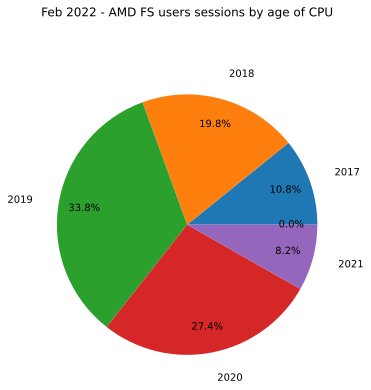

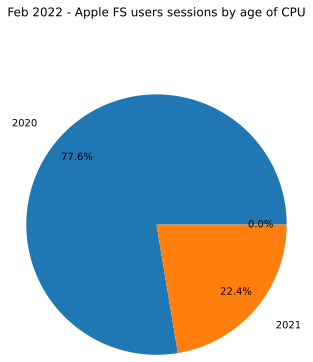

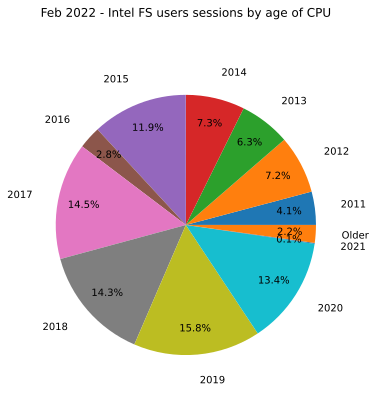

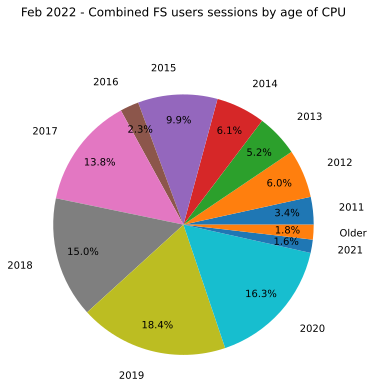

In [91]:
plot_by_cpu_pie_age(amd_with_date_22, "Feb 2022 - AMD FS users sessions by age of CPU")
plot_by_cpu_pie_age(apple_with_date_22, "Feb 2022 - Apple FS users sessions by age of CPU")
plot_by_cpu_pie_age(intel_with_date_22, "Feb 2022 - Intel FS users sessions by age of CPU")
plot_by_cpu_pie_age(all_with_date_22, "Feb 2022 - Combined FS users sessions by age of CPU")

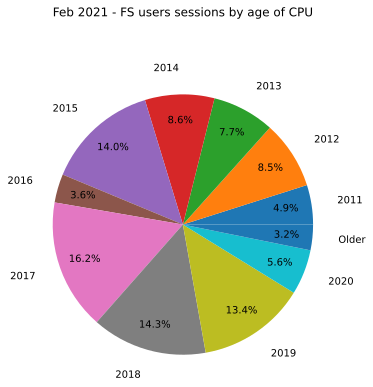

In [92]:
plot_by_cpu_pie_age(intel_with_date_21, "Feb 2021 - FS users sessions by age of CPU")

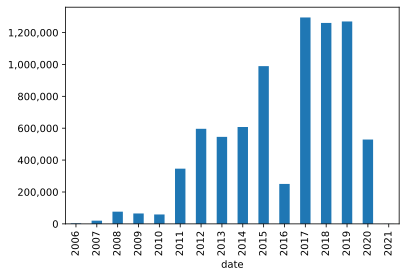

In [93]:
plot_by_cpu_age(all_with_date_21)

In [94]:
def combine_2y_agg(year1, year2, y1label="Y1", y2label="Y2"):
    y1 = get_count_by_cpu_age(year1)
    y2 = get_count_by_cpu_age(year2)
    combined = pd.concat([y2.rename(y2label), y1.rename(y1label)], axis=1)
    tot2 = combined[y2label].agg('sum')
    tot1 = combined[y1label].agg('sum')

    combined[y2label+'pct'] = combined[y2label]/tot2*100
    combined[y1label+'pct'] = combined[y1label]/tot1*100
    combined['changepct'] = combined[y2label+'pct']-combined[y1label+'pct']
    combined['change'] = combined[y2label]-combined[y1label]
    combined['rateofpctchange'] = combined['changepct']/combined[y1label+'pct']*100
    return combined
combined = combine_2y_agg(all_with_date_21,all_with_date_22,y1label="Feb21", y2label="Feb22")
display(combined)


,Feb22,Feb21,Feb22pct,Feb21pct,changepct,change,rateofpctchange
date,,,,,,,
2006-12-31,2454.0,3298.0,0.034199,0.041671,-0.007472,-844.0,-17.931156
2007-12-31,8807.0,20056.0,0.122736,0.253415,-0.130679,-11249.0,-51.567366
2008-12-31,42399.0,76574.0,0.590878,0.967541,-0.376663,-34175.0,-38.929892
2009-12-31,42125.0,65319.0,0.587060,0.825330,-0.238270,-23194.0,-28.869674
2010-12-31,36128.0,58884.0,0.503485,0.744021,-0.240536,-22756.0,-32.329244
2011-12-31,246445.0,346346.0,3.434492,4.376211,-0.941719,-99901.0,-21.519051
2012-12-31,431319.0,596218.0,6.010922,7.533437,-1.522515,-164899.0,-20.210101
2013-12-31,376317.0,545725.0,5.244406,6.895439,-1.651033,-169408.0,-23.943839
2014-12-31,437570.0,607794.0,6.098037,7.679704,-1.581668,-170224.0,-20.595422


In [95]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import LogFormatter

class CustomLog(LogFormatter):
    def __call__(self, val, pos = None):
        if val<1000:
            return ScalarFormatter.__call__(self, val) 
        else:
            return LogFormatter.__call__(self, val)

class CustomLogPercent(LogFormatter,PercentFormatter):
    def __init__(self):
        LogFormatter.__init__(self)
        PercentFormatter.__init__(self)
                
    def __call__(self, val, pos = None, xmax=100):
        if abs(val)<10000:
            return PercentFormatter.__call__(self, val) 
        else:
            return LogFormatter.__call__(self, val)+"%"

def plot_multiyear_cpu_age(timeline, title=None, logscale=False, ylabel = None, percent=True, ax=None):
    # if not percent and not logscale:
    #     plt.ticklabel_format(style='plain', axis='y')
    ax = timeline.plot.bar(ax=ax)
    plt.subplots_adjust(bottom=.25, left=.25)
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, p: str(timeline.index[x])[0:4] if str(timeline.index[x])[0] != '<' else str(timeline.index[x])))
    if logscale:
        ax.set_yscale('symlog')
        if percent:
            ax.yaxis.set_major_formatter(CustomLogPercent())
        else:
            ax.yaxis.set_major_formatter(CustomLog())
        if ylabel is not None:
            ylabel =ylabel + '\n(log scale)'
    else:
        if percent:
            ax.yaxis.set_major_formatter(PercentFormatter())
        else:
            ax.yaxis.set_major_formatter(
                FuncFormatter(lambda x, p: format(int(x), ',')))
    if title is not None:
        ax.set_title(title)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    return ax
    

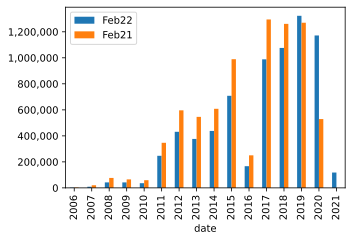

In [96]:
plot_multiyear_cpu_age(combined[['Feb22', 'Feb21']], percent=False)
plt.show()

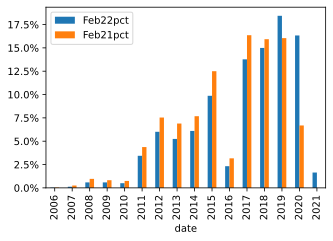

In [97]:
plot_multiyear_cpu_age(combined[['Feb22pct', 'Feb21pct']],percent=True)
plt.show()

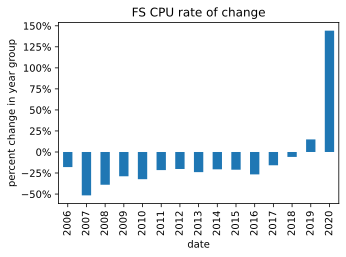

In [98]:
plot_multiyear_cpu_age(combined[combined['rateofpctchange'] < 300]['rateofpctchange'], title="FS CPU rate of change", ylabel="percent change in year group")
plt.show()

<AxesSubplot:title={'center':'FS CPU rate of change'}, xlabel='date', ylabel='percent change in year group\n(log scale)'>

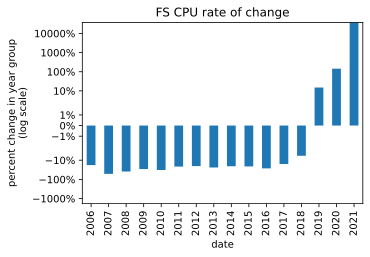

In [99]:
plot_multiyear_cpu_age(combined['rateofpctchange'], title="FS CPU rate of change", ylabel="percent change in year group", logscale=True, percent=True)

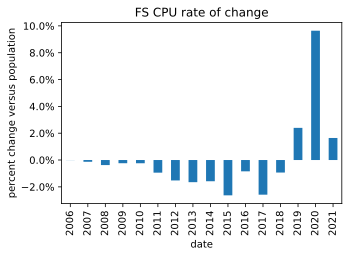

In [100]:
plot_multiyear_cpu_age(combined[combined['changepct'] < 300]['changepct'], title="FS CPU rate of change", ylabel='percent change versus population', percent=True)
plt.show()

In [101]:
# merge_older = 
def summarise_older(df, tot1, tot2, y1label='Y1', y2label='Y2'):
        summarised = df.agg('sum')
        if tot2 !=0:
                summarised[y2label + 'pct'] = summarised[y2label]/tot2*100
        if tot1 !=0:
                summarised[y1label + 'pct'] = summarised[y1label]/tot1*100
        summarised['changepct'] = summarised[y2label + 'pct']-summarised[y1label + 'pct']
        summarised['change'] = summarised[y2label]-summarised[y1label]
        summarised['rateofpctchange'] = summarised['changepct']/summarised[y1label + 'pct']*100
        return summarised

combined_clean = combined.copy()
# timeline.drop(labels=['2010','2009','2008','2007','2006','2005','2004'], inplace=True)

In [102]:
def summarise_and_clean(df, y1label='Y1', y2label='Y2',fromYear=None, toYear='2011-1-1',):
    tot2 = df[y2label].agg('sum')
    tot1 = df[y1label].agg('sum')
    older_machines = df.loc[fromYear:toYear]
    summarised=summarise_older(older_machines, tot1, tot2, y1label=y1label, y2label=y2label)
    clean = df.drop(older_machines.index)
    summarised.rename("<2011", inplace=True)
    sumdf = pd.DataFrame([summarised])
    clean = pd.concat([sumdf,clean])
    clean[y2label + 'cumpct'] = clean[[y2label + 'pct']].cumsum(0)
    clean[y1label + 'cumpct'] = clean[[y1label + 'pct']].cumsum(0)
    return clean

combined_clean = summarise_and_clean(combined, y1label='Feb21', y2label='Feb22')

In [103]:
combined_clean

,Feb22,Feb21,Feb22pct,Feb21pct,changepct,change,rateofpctchange,Feb22cumpct,Feb21cumpct
<2011,131913.0,224131.0,1.838358,2.831979,-0.993621,-92218.0,-35.085745,1.838358,2.831979
2011-12-31 00:00:00,246445.0,346346.0,3.434492,4.376211,-0.941719,-99901.0,-21.519051,5.272850,7.208190
2012-12-31 00:00:00,431319.0,596218.0,6.010922,7.533437,-1.522515,-164899.0,-20.210101,11.283772,14.741627
2013-12-31 00:00:00,376317.0,545725.0,5.244406,6.895439,-1.651033,-169408.0,-23.943839,16.528179,21.637067
2014-12-31 00:00:00,437570.0,607794.0,6.098037,7.679704,-1.581668,-170224.0,-20.595422,22.626215,29.316771
2015-12-31 00:00:00,708121.0,989384.0,9.868473,12.501237,-2.632763,-281263.0,-21.060022,32.494689,41.818008
2016-12-31 00:00:00,166642.0,250492.0,2.322346,3.165060,-0.842714,-83850.0,-26.625523,34.817035,44.983068
2017-12-31 00:00:00,988447.0,1294628.0,13.775136,16.358109,-2.582973,-306181.0,-15.790168,48.592171,61.341177
2018-12-31 00:00:00,1076015.0,1260650.0,14.995496,15.928784,-0.933288,-184635.0,-5.859130,63.587667,77.269961
2019-12-31 00:00:00,1323062.0,1269505.0,18.438377,16.040670,2.397707,53557.0,14.947675,82.026044,93.310631


## How quickly are people giving up their older CPUs?
During 2021 we see new machines being added with chips from the current and previous 2 years, this can be assumed to be normal, as purchasing a machine older than that is hard, with second hand sales probably not affecting the numbers over much.
The high numbers for 2021 and 2020 skew the graph axes, so by restricting our view to 2019 and earlier we see that about 35% of users on very old (pre-2011) machines gave them up.


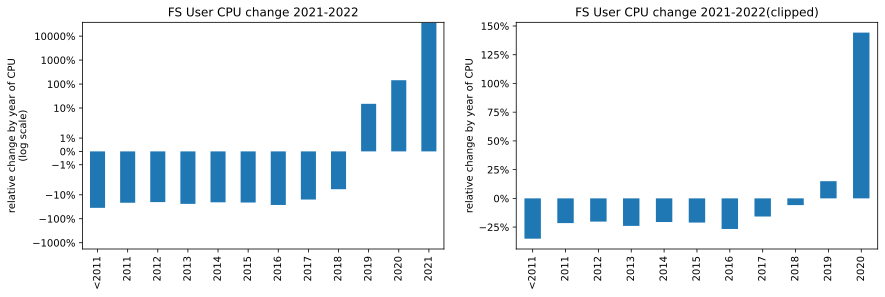

In [104]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
ax_full = axs[0]
ax_clipped = axs[1]
ax_full = plot_multiyear_cpu_age(combined_clean['rateofpctchange'],logscale=True, percent=True, title="FS User CPU change 2021-2022", ylabel="relative change by year of CPU", ax=ax_full)
# plt.show()
ax_clipped = plot_multiyear_cpu_age(combined_clean.iloc[0:-1]['rateofpctchange'], percent=True, title="FS User CPU change 2021-2022(clipped)", ylabel="relative change by year of CPU", ax=ax_clipped)



## But those older machines are already a small proportion of the user base.
The graphs above illustrate the rate of change within each "peer group", a user of a pre-2011 machine had a more than one in three likelihood to have ugraded (or left FS/SL)
If we look at the population overall, we see that whilst the vast majority of people are using machine made in the last 10 years, only 50% are within the last five years.
The dwindling legacy machines, those shown here as being prior to 2011 are both a small proportion and rapidly shrinking. Helped no doubt by the EOL status of Windows 7.



<Figure size 1080x576 with 0 Axes>

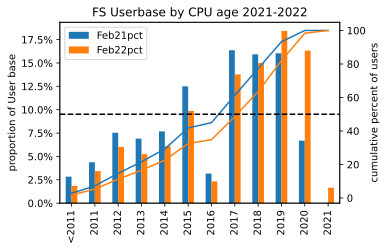

In [105]:
plt.figure(num=1,figsize=(15,8))
ax = plot_multiyear_cpu_age(combined_clean[['Feb21pct','Feb22pct']], percent=True, title="FS Userbase by CPU age 2021-2022", ylabel="proportion of User base")
ax2 = ax.twinx()
combined_clean['Feb21cumpct'].plot(ax=ax2)
combined_clean['Feb22cumpct'].plot(ax=ax2)
# ax2.set_yticks([0,25,50, 75,100], minor=False)
# ax2.yaxis.grid(True, which="major")
ax2.axhline(50, linestyle='--', color='k') # horizontal lines
ax2.set_ylabel("cumulative percent of users")
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, p: str(combined_clean.index[x])[0:4] if str(combined_clean.index[x])[0] != '<' else str(combined_clean.index[x])))

plt.show()

## Laptop users vs the rest.
For Intel we can examine the behaaviour laptop and desktop separately

In [106]:
with_class_22 = intel_with_date_22.merge(intel_ark_processors[['processor_number','vertical_segment']], on='processor_number' )
with_class_21 = intel_with_date_21.merge(intel_ark_processors[['processor_number','vertical_segment']], on='processor_number' )

In [107]:
display(with_class_22[with_class_22['date'] < '2009-01-01'])

,CNT,cpu,cpu_make,processor_number,count,date,64,vertical_segment
210,1147,Intel Core2 Duo P8600,Intel,p8600,1708.0,2008-07-01,True,Mobile
211,1147,Intel Core2 Duo P8600,Intel,p8600,1708.0,2008-07-01,True,Mobile
212,1147,Intel Core2 Duo P8600,Intel,p8600,1708.0,2008-07-01,True,Mobile
213,1147,Intel Core2 Duo P8600,Intel,p8600,1708.0,2008-07-01,True,Mobile
354,465,Intel Core i7-920,Intel,i7-920,9028.0,2008-10-01,True,Desktop
...,...,...,...,...,...,...,...,...
942,1,Intel Core2 Duo T8100,Intel,t8100,2.0,2008-01-01,True,Mobile
943,1,Intel Core2 Duo T8100,Intel,t8100,2.0,2008-01-01,True,Mobile
944,1,Intel Core2 Duo T8100,Intel,t8100,2.0,2008-01-01,True,Mobile
945,1,Intel Core2 Duo T8100,Intel,t8100,2.0,2008-01-01,True,Mobile


## Filter data to give other views

In [108]:
combined_mobile = combine_2y_agg(with_class_21[with_class_21['vertical_segment'].str.contains('Mobile')], with_class_22[with_class_22['vertical_segment'].str.contains('Mobile')],y1label='Feb21', y2label='Feb22')
combined_nonmobile = combine_2y_agg(with_class_21[~(with_class_21['vertical_segment'].str.contains('Mobile'))], with_class_22[~(with_class_22['vertical_segment'].str.contains('Mobile'))],y1label='Feb21', y2label='Feb22')
# display(with_class_21[with_class_21['64'].isna()])
# combined_64 = combine_2y_agg(with_class_21[with_class_21['64']], with_class_22[with_class_22['64']],y1label='Feb21', y2label='Feb22')
# combined_32 = combine_2y_agg(with_class_21[~with_class_21['64'].astype(bool)], with_class_22[~with_class_22['64'].astype(bool)],y1label='Feb21', y2label='Feb22')


,CNT,cpu,cpu_make,processor_number,count,date,64,vertical_segment


In [ ]:
plot_multiyear_cpu_age(combined_mobile[['Feb21', 'Feb22']], percent=False,title="Mobile CPU sessions")
plot_multiyear_cpu_age(combined_nonmobile[['Feb21', 'Feb22']], percent=False, title="Non-mobile CPU sessions")
plt.show()

In [110]:
mobile = summarise_and_clean(combined_mobile, 'Feb21', 'Feb22')
nonmobile = summarise_and_clean(combined_nonmobile, 'Feb21', 'Feb22')
# intel64 = summarise_and_clean(combined_64, 'Feb21', 'Feb22')
# intel32 = summarise_and_clean(combined_32, 'Feb21', 'Feb22')
display(mobile)
display(nonmobile)
# display(intel64)

,Feb22,Feb21,Feb22pct,Feb21pct,changepct,change,rateofpctchange,Feb22cumpct,Feb21cumpct
<2011,20011.0,47951.0,0.674177,1.291368,-0.617191,-27940.0,-47.793574,0.674177,1.291368
2011-12-31 00:00:00,105354.0,169784.0,3.549410,4.572450,-1.023041,-64430.0,-22.374018,4.223586,5.863818
2012-12-31 00:00:00,263332.0,411879.0,8.871738,11.092307,-2.220569,-148547.0,-20.019000,13.095325,16.956125
2013-12-31 00:00:00,181615.0,293851.0,6.118667,7.913697,-1.795030,-112236.0,-22.682575,19.213991,24.869822
2014-12-31 00:00:00,126491.0,197030.0,4.261522,5.306212,-1.044690,-70539.0,-19.688061,23.475513,30.176034
2015-12-31 00:00:00,341416.0,510841.0,11.502413,13.757451,-2.255039,-169425.0,-16.391398,34.977926,43.933486
2016-12-31 00:00:00,149126.0,227553.0,5.024102,6.128227,-1.104124,-78427.0,-18.017031,40.002028,50.061712
2017-12-31 00:00:00,367804.0,523614.0,12.391433,14.101441,-1.710008,-155810.0,-12.126477,52.393461,64.163153
2018-12-31 00:00:00,369960.0,489247.0,12.464069,13.175904,-0.711834,-119287.0,-5.402548,64.857530,77.339057
2019-12-31 00:00:00,628539.0,633253.0,21.175677,17.054127,4.121550,-4714.0,24.167465,86.033208,94.393184


,Feb22,Feb21,Feb22pct,Feb21pct,changepct,change,rateofpctchange,Feb22cumpct,Feb21cumpct
<2011,123168.0,198944.0,3.841164,5.422775,-1.581611,-75776.0,-29.166085,3.841164,5.422775
2011-12-31 00:00:00,180699.0,240004.0,5.635348,6.541980,-0.906633,-59305.0,-13.858690,9.476512,11.964756
2012-12-31 00:00:00,276055.0,350715.0,8.609156,9.559718,-0.950562,-74660.0,-9.943414,18.085668,21.524474
2013-12-31 00:00:00,225622.0,299998.0,7.036333,8.177285,-1.140951,-74376.0,-13.952692,25.122001,29.701759
2014-12-31 00:00:00,311079.0,410764.0,9.701428,11.196522,-1.495094,-99685.0,-13.353201,34.823429,40.898281
2015-12-31 00:00:00,366705.0,478543.0,11.436201,13.044028,-1.607827,-111838.0,-12.326152,46.259630,53.942309
2016-12-31 00:00:00,17516.0,22939.0,0.546261,0.625267,-0.079006,-5423.0,-12.635568,46.805891,54.567575
2017-12-31 00:00:00,498896.0,620217.0,15.558760,16.905749,-1.346989,-121321.0,-7.967640,62.364651,71.473325
2018-12-31 00:00:00,504812.0,546361.0,15.743259,14.892597,0.850661,-41549.0,5.711974,78.107910,86.365922
2019-12-31 00:00:00,313196.0,313239.0,9.767449,8.538205,1.229244,-43.0,14.396986,87.875359,94.904128


## Mobile only

In [111]:
def plot_2y_timeline_pct(df, y1label='Y1', y2label='Y2', title='FS Userbase by CPU age'):
    # plt.figure(num=1,figsize=(15,8))
    ax = plot_multiyear_cpu_age(df[[y1label + 'pct', y2label + 'pct']], percent=True, title=title+" ({}-{})".format(y1label,y2label), ylabel="proportion of User base")
    ax2 = ax.twinx()
    df[y1label+'cumpct'].plot(ax=ax2)
    df[y2label+'cumpct'].plot(ax=ax2)
    ax2.axhline(50, linestyle='--', color='k') # horizontal lines
    ax2.set_ylabel("cumulative percent of users")
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, p: str(combined_clean.index[x])[0:4] if str(combined_clean.index[x])[0] != '<' else str(combined_clean.index[x])))
    plt.show()

In [112]:
display(mobile['Feb22'].agg('sum'))
display(nonmobile['Feb22'].agg('sum'))

2968212.0

3206528.0

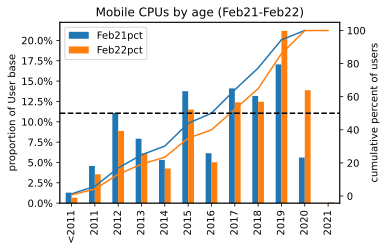

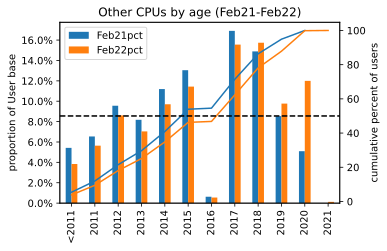

In [113]:
plot_2y_timeline_pct(mobile, 'Feb21', 'Feb22', title='Mobile CPUs by age')
plot_2y_timeline_pct(nonmobile, 'Feb21', 'Feb22', title='Other CPUs by age')

## OS version in use
We support three platforms, how are our users split across these, how old are the OS versions that they use and on windows how many are on a 32-bit OS build?

In [114]:
fs_os_feb_22 = pd.read_csv(
    "./stats/os_Feb_2022.csv",
    skipinitialspace=True)

In [134]:
invalid = fs_os_feb_22[fs_os_feb_22['VAL'].str.contains('unrecognized')].index
fs_os_feb_22.drop(invalid, inplace=True)
display(fs_os_feb_22[fs_os_feb_22['VAL'].str.contains('Windows')])

,VAL,CNT,OS,Ver,Codename,64
0,Microsoft Windows 10 64-bit,7151594,Microsoft Windows,10 64-bit,10,True
2,Microsoft Windows 7 SP1 64-bit,279661,Microsoft Windows,7 SP1 64-bit,7,True
3,Microsoft Windows 8 64-bit,191874,Microsoft Windows,8 64-bit,8,True
4,Microsoft Windows 8.1 64-bit,123961,Microsoft Windows,8.1 64-bit,8,True
10,Microsoft Windows 7 SP1 32-bit,11448,Microsoft Windows,7 SP1 32-bit,7,False
16,Microsoft Windows 8 32-bit,5187,Microsoft Windows,8 32-bit,8,False
20,Microsoft Windows 11 64-bit,2758,Microsoft Windows,11 64-bit,11,True
21,Microsoft Windows 8 64-bit,2359,Microsoft Windows,8 64-bit,8,True
29,Windows Server 64-bit,857,Windows Server,64-bit,64,True
30,Microsoft Windows 8.1 32-bit,823,Microsoft Windows,8.1 32-bit,8,False


## Work out Mac Os Versions
We tend to know Mac versions by their name, so let's map them to their names

In [116]:
macos_version_map = {
	"Beta": "Kodiak",
	"10.0": "Cheetah",
	"10.1": "Puma",
	"10.2": "Jaguar",
	"10.3": "Panther",
	"10.4": "Tiger",
	"10.5": "Leopard",
	"10.6": "Snow Leopard",
	"10.7": "Lion",
	"10.8": "Mountain Lion",
	"10.9": "Mavericks",
	"10.10": "Yosemite",
	"10.11": "El Capitan",
	"10.12": "Sierra",
	"10.13": "High Sierra",
	"10.14": "Mojave",
	"10.15": "Catalina",
	"10.16": "Big Sur",
	"11": "Big Sur",
	"12": "Monterey"
}

In [122]:
display(fs_os_feb_22)
fs_os_feb_22["VAL"] = fs_os_feb_22["VAL"].str.strip().str.replace('"','')
fs_os_feb_22["OS"] = fs_os_feb_22['VAL'].str.extract('(Mac OS X|Linux|Microsoft Windows|Windows Server)').dropna()

fs_os_feb_22["Ver"] = fs_os_feb_22['VAL'].str.replace('(Microsoft Windows|Linux|Windows Server) +([^"]*).*', r'\g<2>', regex=True)
# fs_os_feb_22[fs_os_feb_22['VAL'].str.contains('(?:Microsoft Windows|Linux|Windows Server)', regex=True)] = fs_os_feb_22['VAL'].str.extract('(?:Microsoft Windows|Linux|Windows Server) +([^"]*)')
# fs_os_feb_22["Ver"] = np.where(fs_os_feb_22['VAL'].str.contains('(?:Microsoft Windows|Linux|Windows Server)', regex=True), fs_os_feb_22['VAL'].str.extract('(?:Microsoft Windows|Linux|Windows Server) +([^"]*)'),None)
fs_os_feb_22['Ver'] = fs_os_feb_22["Ver"].str.replace('Mac OS X ([0-9]+\.[0-9]+).*', repl=r'\g<1>', regex=True)
# fs_os_feb_22["Ver"] = np.where((fs_os_feb_22['Ver'].isna()) & (fs_os_feb_22['OS'].str.contains('Mac OS X')), fs_os_feb_22['VAL'].str.extract('Mac OS X ([0-9]+\.[0-9]+)'), fs_os_feb_22['Ver'])
# fs_os_feb_22["Ver"] = fs_os_feb_22['VAL'].str.extract('(?:Microsoft Windows|Mac OS X|Linux|Windows Server) +([^"]*)')
# fs_os_feb_22[(fs_os_feb_22['Ver'].isna()) & (fs_os_feb_22['OS'].str.contains('Microsoft Windows'))]['VAL'].str.extract('Microsoft Windows +([^"]+$)')
# fs_os_feb_22["Ver"] = fs_os_feb_22[fs_os_feb_22['OS'].str.contains('Mac OS X')]['VAL'].str.extract('Mac OS X ([0-9]+\.[0-9]+)')
fs_os_feb_22["Ver"] = np.where(fs_os_feb_22['OS'].str.contains('Mac OS X'), fs_os_feb_22['Ver'].str.replace(r'(^(11|12)(.*))',r'\g<2>',regex=True).str.strip(), fs_os_feb_22['Ver'].str.strip())
fs_os_feb_22["Codename"] = np.where(fs_os_feb_22['OS'].str.contains('Mac OS X'), fs_os_feb_22['Ver'].map(macos_version_map), fs_os_feb_22['Ver'].replace('^([0-9]+).*$', r'\g<1>', regex=True))
fs_os_feb_22["Codename"] = fs_os_feb_22["Codename"].str.replace('Vista.*','Vista', regex=True)
fs_os_feb_22.loc[fs_os_feb_22['Ver'].str.contains('64-bit'),'64'] = True
fs_os_feb_22['64'].fillna(False,inplace=True)
display(fs_os_feb_22[fs_os_feb_22['OS'].str.contains('Windows')])

,VAL,CNT,OS,Ver,Codename,64
0,Microsoft Windows 10 64-bit,7151594,Microsoft Windows,10 64-bit,10,True
1,Mac OS X 10.16.0,321798,Mac OS X,10.16,Big Sur,NaN
2,Microsoft Windows 7 SP1 64-bit,279661,Microsoft Windows,7 SP1 64-bit,7,True
3,Microsoft Windows 8 64-bit,191874,Microsoft Windows,8 64-bit,8,True
4,Microsoft Windows 8.1 64-bit,123961,Microsoft Windows,8.1 64-bit,8,True
...,...,...,...,...,...,...
103,Linux 5.1,1,Linux,5.1,5,NaN
104,Mac OS X 11.2.3,1,Mac OS X,11,Big Sur,NaN
105,Linux 3.8,1,Linux,3.8,3,NaN
106,Mac OS X 11.6.1,1,Mac OS X,11,Big Sur,NaN


,VAL,CNT,OS,Ver,Codename,64
0,Microsoft Windows 10 64-bit,7151594,Microsoft Windows,10 64-bit,10,True
2,Microsoft Windows 7 SP1 64-bit,279661,Microsoft Windows,7 SP1 64-bit,7,True
3,Microsoft Windows 8 64-bit,191874,Microsoft Windows,8 64-bit,8,True
4,Microsoft Windows 8.1 64-bit,123961,Microsoft Windows,8.1 64-bit,8,True
10,Microsoft Windows 7 SP1 32-bit,11448,Microsoft Windows,7 SP1 32-bit,7,False
16,Microsoft Windows 8 32-bit,5187,Microsoft Windows,8 32-bit,8,False
20,Microsoft Windows 11 64-bit,2758,Microsoft Windows,11 64-bit,11,True
21,Microsoft Windows 8 64-bit,2359,Microsoft Windows,8 64-bit,8,True
29,Windows Server 64-bit,857,Windows Server,64-bit,64,True
30,Microsoft Windows 8.1 32-bit,823,Microsoft Windows,8.1 32-bit,8,False


## The session based data more or less reflects what we'd expect.
there will be some bias due to laptops that further amplifies the dominance of Windows.

4

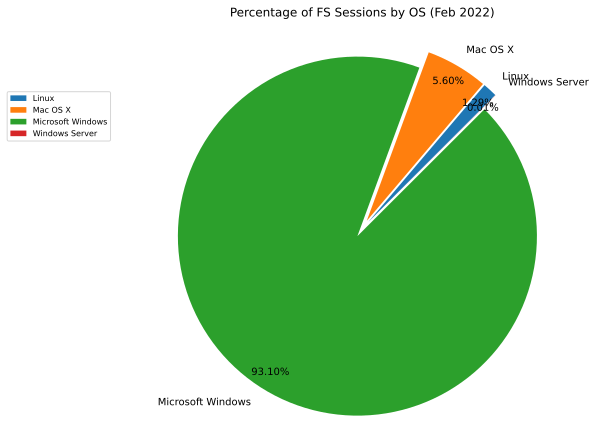

In [118]:

num_versions = 4
    # return just_cpu.drop_duplicates(subset=['processor_number'])
# num_versions = fs_os_feb_22.groupby('Codename')
display(num_versions)
explode = (0.1,) * num_versions
ax = fs_os_feb_22.groupby("OS").sum().plot(y='CNT',kind="pie", radius=2 ,autopct='%1.2f%%', explode = explode, pctdistance=0.9, shadow=False, startangle=45,labeldistance = 1.1)
plt.figure(1, figsize=(5,5))
ax.set_title("Percentage of FS Sessions by OS (Feb 2022)", pad=100)
# ax.set_xlabel("% MacOS Sessions by Version (Feb 2022)")
ax.set_ylabel("")

plt.legend(loc='center left', bbox_to_anchor=(-1.1, 1.),
           fontsize=8)
plt.subplots_adjust(left=0.1, bottom=0.1, right=3)

Codename
Big Sur        321883
Catalina        65756
High Sierra     35562
Mojave          27475
Sierra           8547
El Capitan       7959
Monterey          165
Mavericks           2
Name: CNT, dtype: int64

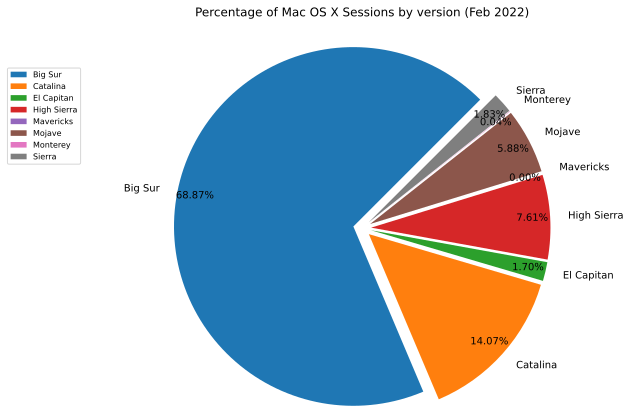

Codename
10       7151594
8         324294
7         292290
11          2758
Vista       1292
XP            31
Name: CNT, dtype: int64

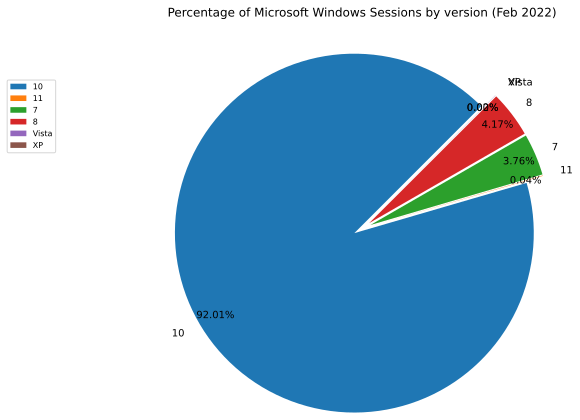

Codename
5    98687
4     9288
3       47
Name: CNT, dtype: int64

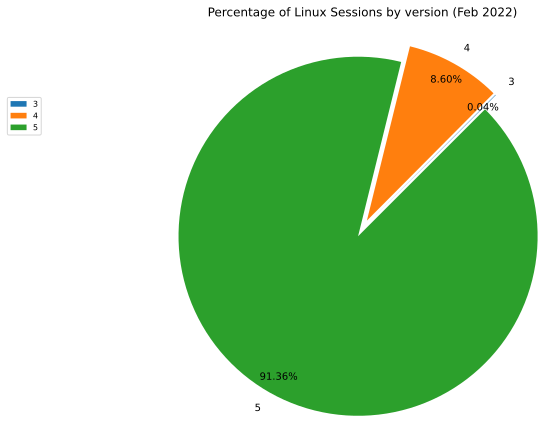

In [139]:
def PieChartOSVersionCodename(os):
    num_versions = fs_os_feb_22[fs_os_feb_22['OS'].str.contains(os)]['Codename'].value_counts().count()
    # display(num_versions)
    explode = (0.1,) * num_versions
    ax = fs_os_feb_22[fs_os_feb_22['OS'].str.contains(os)].groupby("Codename").sum().plot(y='CNT',kind="pie", radius=2 ,autopct='%1.2f%%', pctdistance=0.9,explode= explode, shadow=False, startangle=45,labeldistance = 1.1)
    plt.figure(1, figsize=(5,5))
    ax.set_title("Percentage of {} Sessions by version (Feb 2022)".format(os), pad=100)
    # ax.set_xlabel("% MacOS Sessions by Version (Feb 2022)")
    ax.set_ylabel("")

    plt.legend(loc='center left', bbox_to_anchor=(-1.1, 1.),
            fontsize=8)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=3)
    display(fs_os_feb_22[fs_os_feb_22['OS'].str.contains(os)].groupby("Codename")["CNT"].sum().sort_values(ascending=False))

PieChartOSVersionCodename('Mac OS X')
plt.show()
PieChartOSVersionCodename('Microsoft Windows')
plt.show()
PieChartOSVersionCodename('Linux')
plt.show()

## How many sessions were run on a 32 bit OS?
Earlier we determined that there were no CPUs in use that were incapable of running a 64-bit OS. 
We can see from the OS data that there are a number of 32-bit versions of Windows in use.

What the result below shows is that very few people are still running a 32 bit OS, though 18000 sessions in 28 days does mean it is more than one or two individuals. 

What we cannot tell from the data we have is whether people on a 64-bit OS are running a 32-bit viewer by choice.
If we are able to obtain the per machine summaries then we will be able to associate the viewer build with the OS and the CPU and draw absolutely conclusive data from this.

### Only 18282 (0.24%) of FS sessions in Feb 2022 were on a 32-bit OS

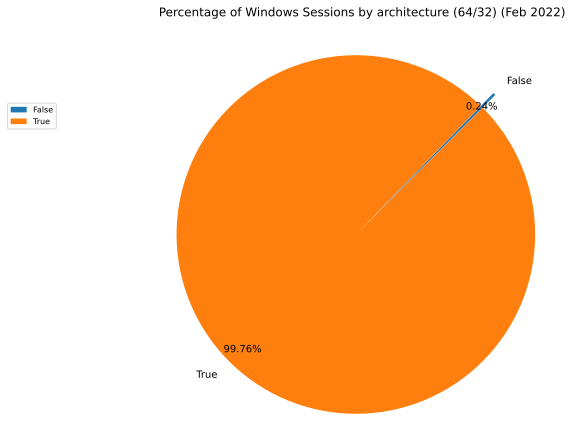

In [130]:
def PieChartOS32_64bit(os):
    num_versions = 2
    explode = (0.1,) * num_versions
    ax = fs_os_feb_22[fs_os_feb_22['OS'].str.contains(os)].groupby("64").sum().plot(y='CNT',kind="pie", radius=2 ,autopct='%1.2f%%', pctdistance=0.9,explode= explode, shadow=False, startangle=45,labeldistance = 1.1)
    plt.figure(1, figsize=(5,5))
    ax.set_title("Percentage of {} Sessions by architecture (64/32) (Feb 2022)".format(os), pad=100)
    # ax.set_xlabel("% MacOS Sessions by Version (Feb 2022)")
    ax.set_ylabel("")

    plt.legend(loc='center left', bbox_to_anchor=(-1.1, 1.),
            fontsize=8)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=3)

PieChartOS32_64bit("Windows")
win64bit_sessions = fs_os_feb_22[fs_os_feb_22['OS'].str.contains("Windows")&(fs_os_feb_22['64'])]['CNT'].agg('sum')
win32bit_sessions = fs_os_feb_22[fs_os_feb_22['OS'].str.contains("Windows")&~(fs_os_feb_22['64'])]['CNT'].agg('sum')
display(Markdown("### Only {n32} ({p32:.2f}%) of FS sessions in {d} were on a 32-bit OS".format(n32=win32bit_sessions,p32=win32bit_sessions/(win32bit_sessions+win64bit_sessions)*100,d='Feb 2022')))


## Some people seem to be running Windows Server. 
This may be entirely legitimate but it may also indicate an automated copybot like system?

In [120]:
fs_os_feb_22[fs_os_feb_22['OS'].str.contains('Windows Server')]

,VAL,CNT,OS,Ver,Codename
29,Windows Server 64-bit,857,Windows Server,64-bit,64
66,Windows Server 2012 R2 64-bit,57,Windows Server,2012 R2 64-bit,2012
71,Windows Server 2008 R2 SP1 64-bit,48,Windows Server,2008 R2 SP1 64-bit,2008
98,Windows Server 2016 64-bit,3,Windows Server,2016 64-bit,2016
